# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* https://laurentperrinet.github.io/sciblog/posts/2017-03-29-testing-comps-pcum.html
* https://laurentperrinet.github.io/sciblog/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* https://laurentperrinet.github.io/sciblog/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from shl_scripts import SHL_set
tag = 'HAP'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 9
    n_jobs = 4
    n_jobs = 10
    n_jobs = 35

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'alpha_MP', 'eta_precision', ]
variables = ['eta', 'eta_homeo', 'alpha_MP']
variables = ['eta', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo', 'batch_size']

list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_dico', ]
list_figures = []

display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime', 'F']
display_variables = ['F', 'cputime']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/HAP.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
print('# of pixels per patch =', experiments.shl.patch_width**2)

# of pixels per patch = 441


In [7]:
676**.5, 4096**.5

(26.0, 64.0)

In [8]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  1851 Sep  5 21:58 cache_dir/HAP.py


In [9]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   1 tasks      | elapsed:  7.1min
[Parallel(n_jobs=35)]: Done   2 out of  27 | elapsed:  7.5min remaining: 93.9min
[Parallel(n_jobs=35)]: Done   4 out of  27 | elapsed:  8.9min remaining: 51.2min
[Parallel(n_jobs=35)]: Done   6 out of  27 | elapsed: 10.0min remaining: 35.0min
[Parallel(n_jobs=35)]: Done   8 out of  27 | elapsed: 10.0min remaining: 23.8min
[Parallel(n_jobs=35)]: Done  10 out of  27 | elapsed: 10.0min remaining: 17.0min
[Parallel(n_jobs=35)]: Done  12 out of  27 | elapsed: 10.0min remaining: 12.5min
[Parallel(n_jobs=35)]: Done  14 out of  27 | elapsed: 10.0min remaining:  9.3min
[Parallel(n_jobs=35)]: Done  16 out of  27 | elapsed: 10.0min remaining:  6.9min
[Parallel(n_jobs=35)]: Done  18 out of  27 | elapsed: 10.0min remaining:  5.0min
[Parallel(n_jobs=35)]: Done  20 out of  27 | elapsed: 10.0min remaining:  3.5min
[Parallel(n_jobs=35)]: Done  22 out of  27 | elapse

Running variable eta with value 0.0025
Running variable eta with value 0.0035
Running variable eta with value 0.0050
Running variable eta with value 0.0071
Running variable eta with value 0.0100
Running variable eta with value 0.0141
Running variable eta with value 0.0200
Running variable eta with value 0.0283
Running variable eta with value 0.0400
Time evolution of  F


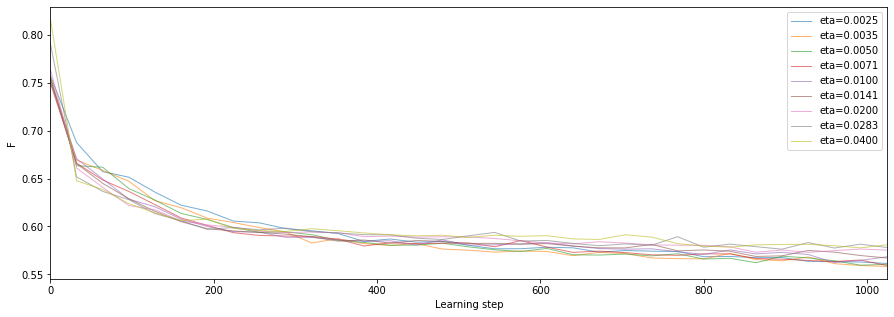

Time evolution of  cputime


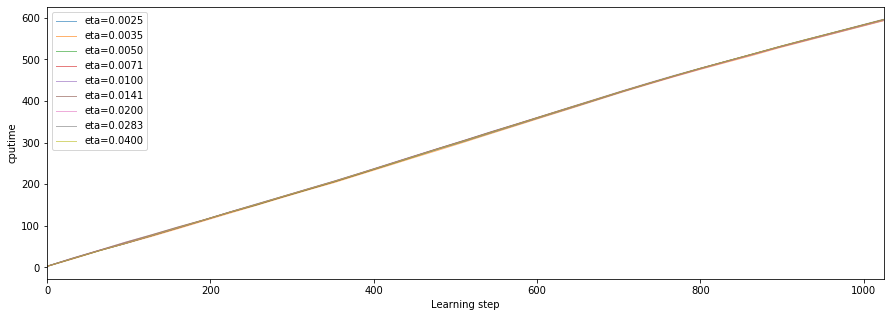

Comparison at the end of learning for  F


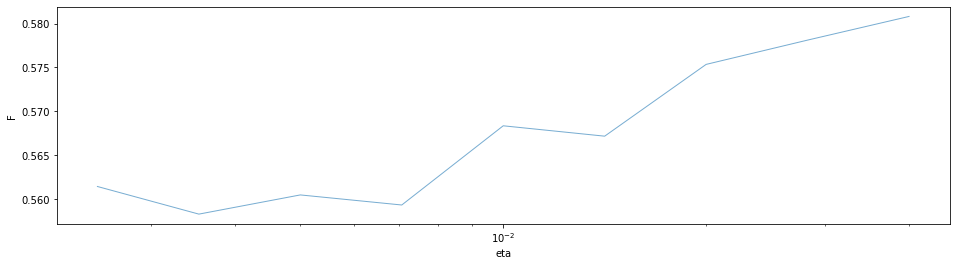

Comparison at the end of learning for  cputime


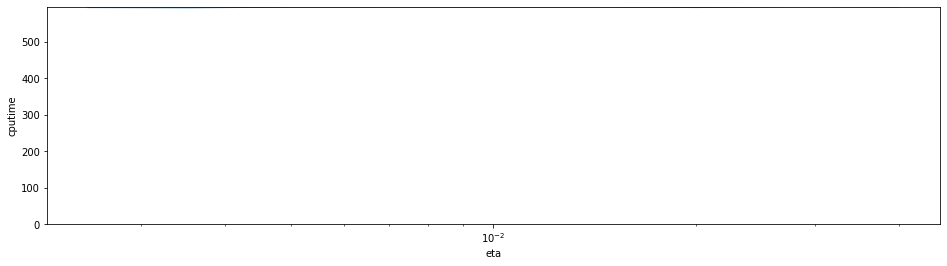

Running variable eta_homeo with value 0.0025
Running variable eta_homeo with value 0.0035
Running variable eta_homeo with value 0.0050
Running variable eta_homeo with value 0.0071
Running variable eta_homeo with value 0.0100
Running variable eta_homeo with value 0.0141
Running variable eta_homeo with value 0.0200
Running variable eta_homeo with value 0.0283
Running variable eta_homeo with value 0.0400
Time evolution of  F


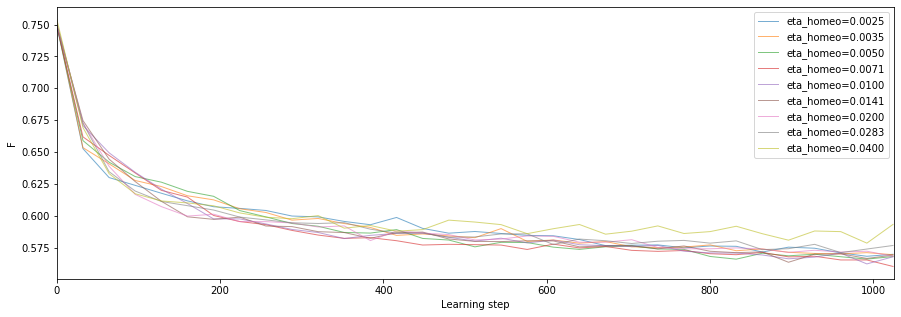

Time evolution of  cputime


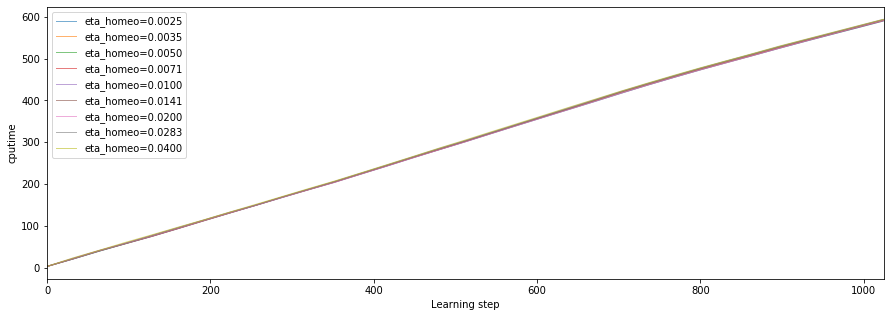

Comparison at the end of learning for  F


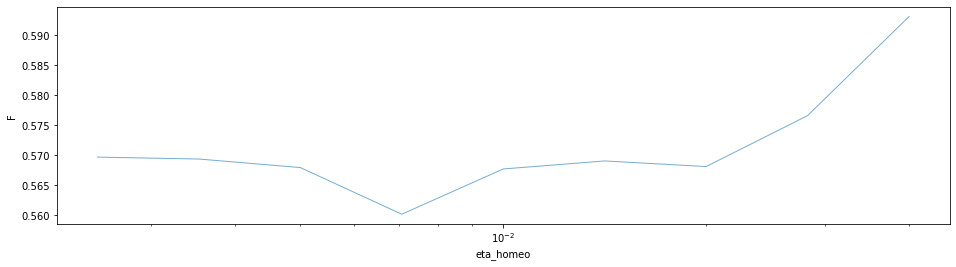

Comparison at the end of learning for  cputime


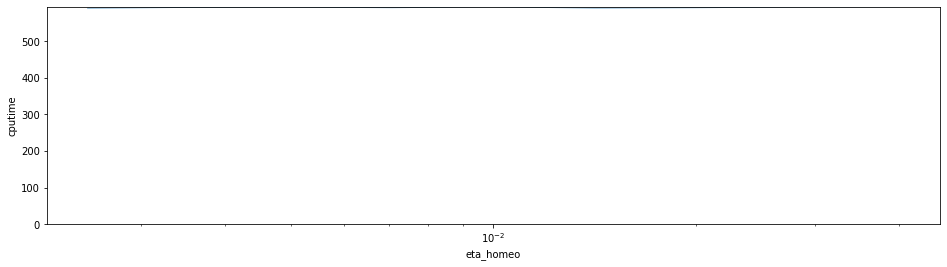

Running variable batch_size with value 64
Running variable batch_size with value 90
Running variable batch_size with value 128
Running variable batch_size with value 181
Running variable batch_size with value 256
Running variable batch_size with value 362
Running variable batch_size with value 512
Running variable batch_size with value 724
Running variable batch_size with value 1024
Time evolution of  F


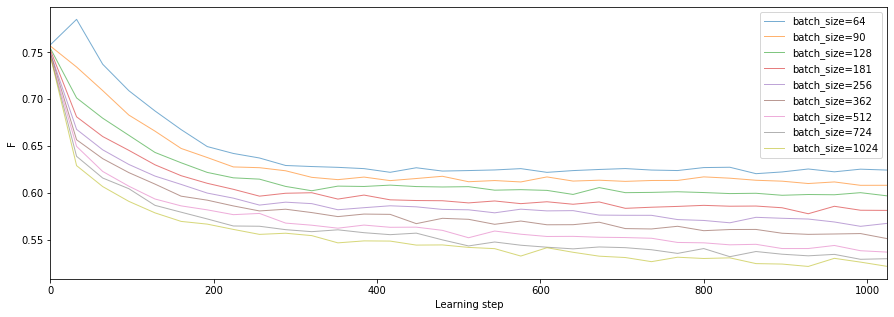

Time evolution of  cputime


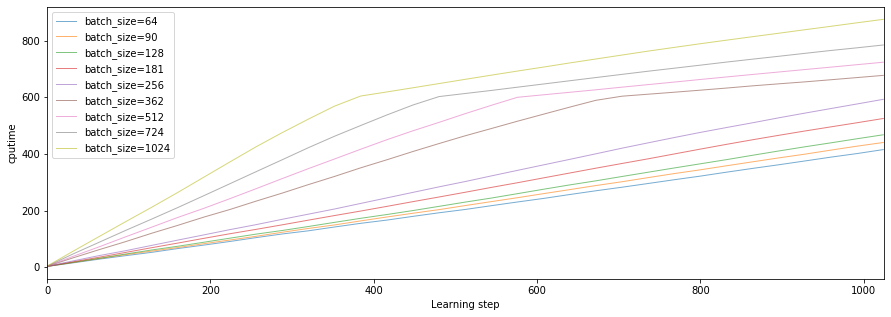

Comparison at the end of learning for  F


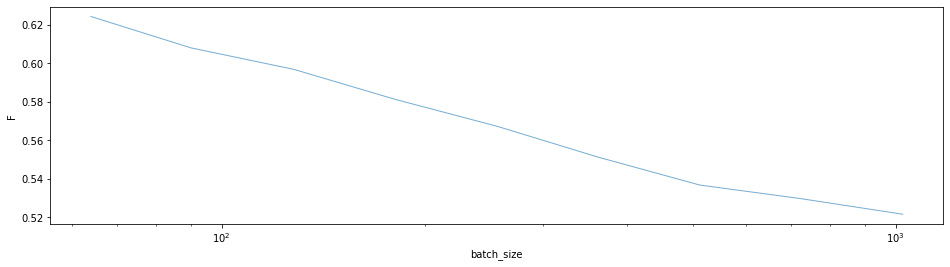

Comparison at the end of learning for  cputime


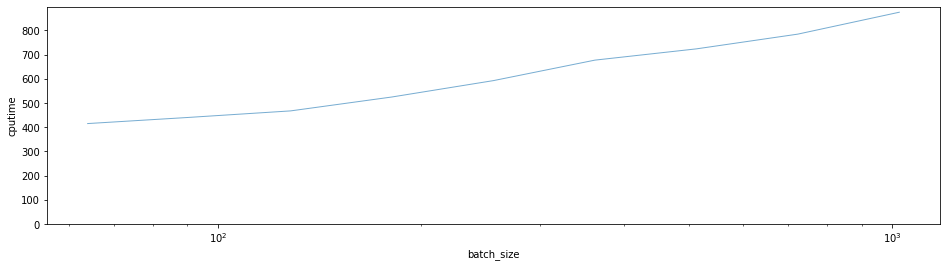

In [10]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [11]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.7.4 64bit [Clang 10.0.1 (clang-1001.0.46.4)]
IPython 7.6.1
OS Darwin 18.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.16.4
shl_scripts 20171221
pandas 0.24.2
matplotlib 3.1.1
Thu Sep 05 22:13:37 2019 CEST

In [12]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,shl_scripts,pandas,matplotlib  -r -g -b

2019-09-05T22:13:37+02:00

CPython 3.7.4
IPython 7.6.1

numpy 1.16.4
shl_scripts 20171221
pandas 0.24.2
matplotlib 3.1.1

compiler   : Clang 10.0.1 (clang-1001.0.46.4)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : ba42b475dbe7fb2ac43545aba4b5cbaf6bfb5dd9
Git repo   : https://github.com/bicv/SparseHebbianLearning
Git branch : master
